# EDA of Bundesliga Football Data

In this project, I've tried to make an exploratory data analysis and visualized some key points regarding Bundesliga metrics from the dataset in this link: https://www.kaggle.com/slehkyi/extended-football-stats-for-european-leagues-xg

Note: This dataset only includes domestic league stats, therefore Champions League, Europa League or DFB Pokal performances weren't put into consideration in this project.

In [1]:
#Necessary library importations and creating the dataframe
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

df = pd.read_csv(r"I:\archive\understat_per_game.csv")

In [2]:
#Getting a general view of the data
print(df.head())
df.date = pd.to_datetime(df.date)
df.describe()
df.info()

       league  year h_a       xG       xGA     npxG     npxGA  deep  \
0  Bundesliga  2014   h  2.57012  1.198420  2.57012  1.198420     5   
1  Bundesliga  2014   a  1.50328  1.307950  1.50328  1.307950    10   
2  Bundesliga  2014   h  1.22987  0.310166  1.22987  0.310166    13   
3  Bundesliga  2014   a  1.03519  0.203118  1.03519  0.203118     6   
4  Bundesliga  2014   h  3.48286  0.402844  3.48286  0.402844    23   

   deep_allowed  scored  missed    xpts result                 date  wins  \
0             4       2       1  2.3486      w  2014-08-22 19:30:00     1   
1             1       1       1  1.5143      d  2014-08-30 17:30:00     0   
2             3       2       0  2.1588      w  2014-09-13 14:30:00     1   
3             2       0       0  2.1367      d  2014-09-20 14:30:00     0   
4             2       4       0  2.9287      w  2014-09-23 19:00:00     1   

   draws  loses  pts     npxGD  ppda_coef  ppda_att  ppda_def  oppda_coef  \
0      0      0    3  1.371700   

In [3]:
#Definitely not necessary, although I just couldn't bear to see it wrote like "Fortuna Duesseldorf" so 
#fixed that
df["team"] = df.team.replace("Fortuna Duesseldorf" ,"Fortuna Düsseldorf")

#Simple function to extract a specific year from the year column
def season_date(frame, year):
    new = frame[frame["year"] == year]
    return new
df_2019 = season_date(df, 2019)
bundesliga = df_2019[df_2019["league"] == "Bundesliga"]
df_2019.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
3060,Bundesliga,2019,h,2.47707,1.18459,1.71929,1.184590,17,2,2,2,2.3576,d,2019-08-16 19:30:00,0,1,0,1,0.534700,10.500000,168,16,16.217391,373,23,Bayern Munich,0.47707,-0.81541,1.3576
3061,Bundesliga,2019,a,1.59729,1.08016,0.83951,1.080160,9,6,3,0,1.8269,w,2019-08-24 17:30:00,1,0,0,3,-0.240650,9.684211,184,19,18.280000,457,25,Bayern Munich,-1.40271,1.08016,-1.1731
3062,Bundesliga,2019,h,3.34597,0.72047,3.34597,0.720470,8,2,6,1,2.8148,w,2019-08-31 14:30:00,1,0,0,3,2.625500,5.354839,166,31,20.350000,407,20,Bayern Munich,-2.65403,-0.27953,-0.1852
3063,Bundesliga,2019,a,1.67040,1.65427,1.67040,0.896496,10,7,1,1,1.3717,d,2019-09-14 16:30:00,0,1,0,1,0.773904,9.142857,192,21,17.178571,481,28,Bayern Munich,0.67040,0.65427,0.3717
3064,Bundesliga,2019,h,2.92351,1.03267,2.16573,1.032670,12,7,4,0,2.5456,w,2019-09-21 13:30:00,1,0,0,3,1.133060,7.920000,198,25,14.500000,319,22,Bayern Munich,-1.07649,1.03267,-0.4544


#  Definition of some metrics according to the original author of the dataset

xG - expected goals metric, it is a statistical measure of the quality of chances created and conceded(from understat.com)

xG_diff - difference between actual goals scored and expected goals.

npxG - expected goals without penalties and own goals.

xGA - expected goals against.

xGA_diff - difference between actual goals missed and expected goals against.

npxGA - expected goals against without penalties and own goals.

npxGD - difference between "for" and "against" expected goals without penalties and own goals.

ppda_coef - passes allowed per defensive action in the opposition half (power of pressure)

oppda_coef - opponent passes allowed per defensive action in the opposition half (power of opponent's pressure)

deep - passes completed within an estimated 20 yards of goal (crosses excluded)

deep_allowed - opponent passes completed within an estimated 20 yards of goal (crosses excluded)

xpts - expected points

xpts_diff - difference between actual and expected points

In [4]:
#Grouped by the team column, then took the means of xG and scored columns 
#in order to compare average xG and goal amounts by team
bundesliga_expected_actual = df_2019[df_2019["league"] == "Bundesliga"].groupby("team")[["xG", "scored"]].mean()
#Reset the index for easier column operations
bundesliga_expected_actual = bundesliga_expected_actual.reset_index()
#Sort values by goal expectation
bundesliga_expected_actual = bundesliga_expected_actual.sort_values("xG", ascending = False)
display(bundesliga_expected_actual)

,team,xG,scored
2,Bayern Munich,2.730928,2.941176
13,RasenBallsport Leipzig,2.239017,2.382353
4,Borussia M.Gladbach,2.164170,1.941176
3,Borussia Dortmund,1.890049,2.470588
1,Bayer Leverkusen,1.820127,1.794118
5,Eintracht Frankfurt,1.715693,1.735294
10,Hoffenheim,1.666492,1.558824
17,Wolfsburg,1.600985,1.411765
6,FC Cologne,1.449339,1.500000
11,Mainz 05,1.358521,1.294118


In [5]:
#Again group by the team columns, although this time compare with
#average successful deep passes per game
bundesliga_deep = bundesliga.groupby("team").deep.mean()
bundesliga_deep = bundesliga_deep.reset_index()
bundesliga_deep = bundesliga_deep.sort_values("deep", ascending = False)
display(bundesliga_deep)

,team,deep
2,Bayern Munich,11.970588
13,RasenBallsport Leipzig,8.911765
3,Borussia Dortmund,8.735294
4,Borussia M.Gladbach,6.823529
1,Bayer Leverkusen,6.764706
10,Hoffenheim,5.911765
14,Schalke 04,5.705882
17,Wolfsburg,5.647059
5,Eintracht Frankfurt,5.529412
16,Werder Bremen,5.470588


In [6]:
#Same as the above two cells
bundesliga_points = df_2019[df_2019["league"] == "Bundesliga"].groupby("team")[["pts", "xpts"]].sum()
bundesliga_points = bundesliga_points.reset_index()
bundesliga_points = bundesliga_points.sort_values("pts", ascending = False)
bundesliga_xpoints = bundesliga_points.sort_values("xpts", ascending = False)
display(bundesliga_points)

,team,pts,xpts
2,Bayern Munich,82,77.3257
3,Borussia Dortmund,69,62.4827
13,RasenBallsport Leipzig,66,68.7067
4,Borussia M.Gladbach,65,62.6315
1,Bayer Leverkusen,63,54.6178
10,Hoffenheim,52,45.8749
17,Wolfsburg,49,55.6943
8,Freiburg,48,39.1515
5,Eintracht Frankfurt,45,52.7225
15,Union Berlin,41,39.3247


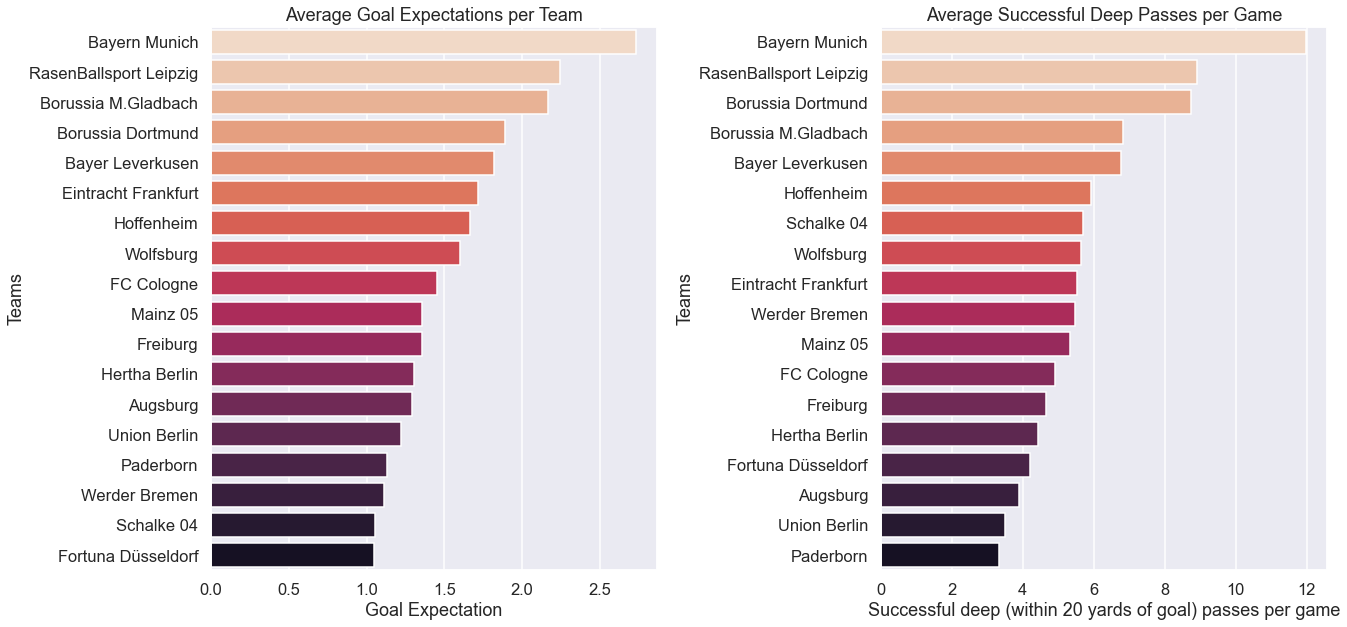

In [7]:
sns.set_context("talk")
sns.set_style("darkgrid")

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace = 0.5)
sns.barplot(x="xG", y="team", palette="rocket_r", data=bundesliga_expected_actual, ax=ax1)
ax1.set(title=("Average Goal Expectations per Team"), xlabel=("Goal Expectation"), ylabel=("Teams"))

sns.barplot(x="deep", y="team", palette="rocket_r", data=bundesliga_deep, ax=ax2)
plt.title("Average Successful Deep Passes per Game")
plt.xlabel("Successful deep (within 20 yards of goal) passes per game")
plt.ylabel("Teams")
plt.show()

# Comparison of deep passing and goal expectations (xG) by team 
We can see on the above left graph that Bayern München had the highest average xG per game, while Fortuna Düsseldorf was last place. 

The metric "deep", which I also used for the right plot was defined by the original author of this dataset as:

"deep - passes completed within an estimated 20 yards of goal (crosses excluded)"

According to the graph, again, Bayern performed best regarding the metric "deep", which pretty much stands for passes around and inside the opponent's penalty box. This might offer a general idea on how teams operate in terms of offensive play, as an example Bayern completed a little bit more than three times the amount of passes Paderborn could (which are last place), and we could extract insights such as: "Bayern have internalized a mentality that mostly employs playing into box with organized passing", 

or: "Paderborn couldn't complete many passes around the box, therefore it indicates that they emphasize a more direct approach when attacking or cross more often" 

using this metric alone.

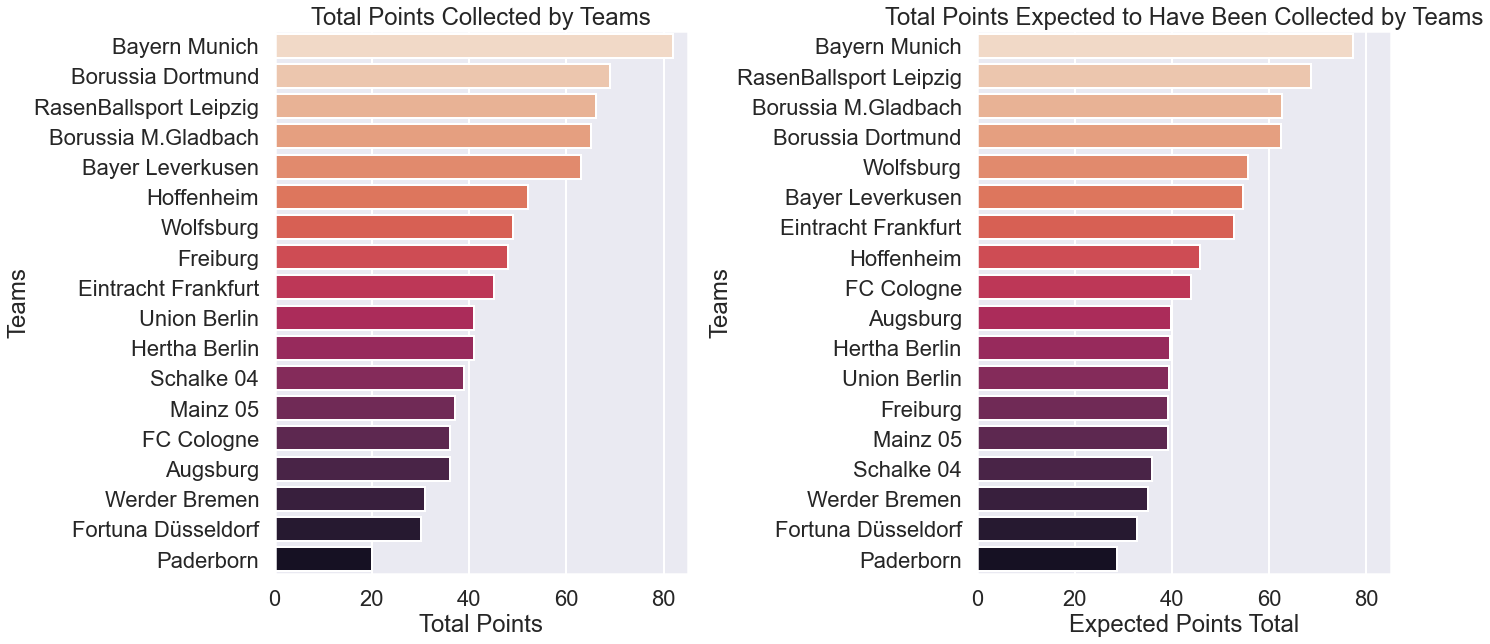

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace = 0.7)
sns.barplot(x="pts", y="team", palette="rocket_r", data=bundesliga_points, ax=ax1)
ax1.set(title = ("Total Points Collected by Teams"), xlabel=("Total Points"), ylabel=("Teams"), xlim=[0, 85])

sns.barplot(x="xpts", y="team", palette="rocket_r", data=bundesliga_xpoints, ax=ax2)
plt.xlabel("Expected Points Total")
plt.ylabel("Teams")
plt.title("Total Points Expected to Have Been Collected by Teams")
plt.xlim([0, 85])
plt.show()

# Comparison of actual and expected points collected by team in Bundesliga 19/20 season
These couple of plots are more interesting to look at in my opinion mostly since they're metrics in direct correlation with each other. 

As could be seen above, in terms of actual points collected Bayern sit on the top, then come Dortmund and Leipzig. Although on the right-side bar plot, that order changes by Bayern, Leipzig, and Gladbach which have the same expected points as Dortmund. This means that Dortmund overperformed in terms of actual count of total points collected, while Leipzig and Gladbach underperformed. In fact, Bayern also underperformed since they went above 80 points in reality while the expected points metric for them is below that number.

Let's create a ratio of actual points divided by expected points and visualize that for each team, so that we could see much easier which teams underperformed/overperformed and to what extent.

In [9]:
#Create variables that represent overperformance and underperformance
#in terms of collecting points
high_xpts = bundesliga_points[bundesliga_points["xpts"] >= bundesliga_points["pts"]]
high_pts = bundesliga_points[bundesliga_points["pts"] > bundesliga_points["xpts"]]
#Create a new column on the dataframe that was grouped by teams and expected points
#that show the ratio of actual points to expected points
bundesliga_points["pts/xpts"] = bundesliga_points["pts"] / bundesliga_points["xpts"]

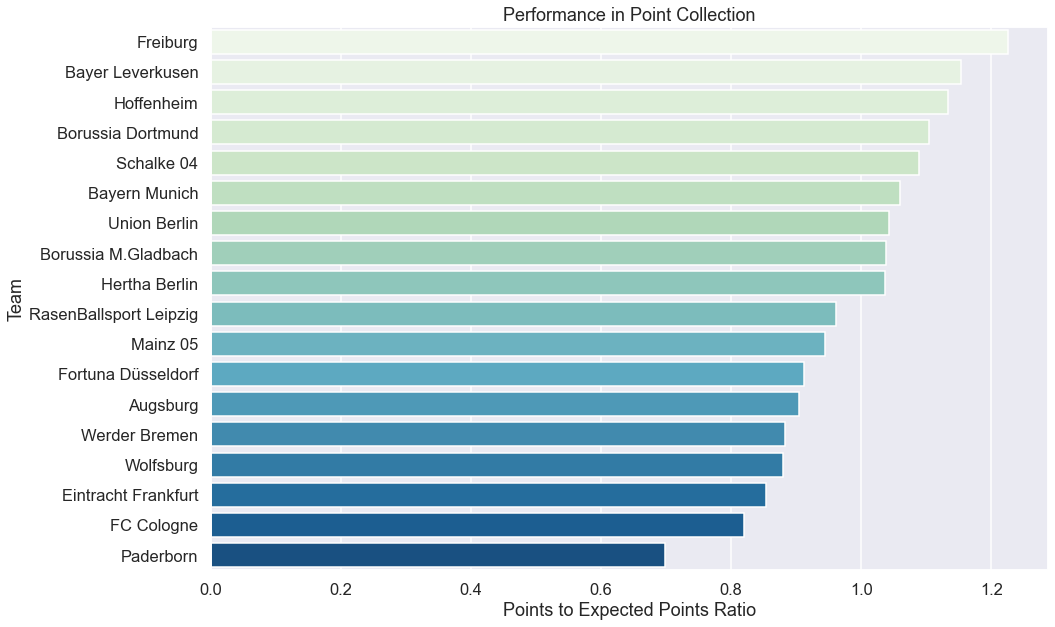

In [10]:
ax = plt.subplots(figsize=(15, 10))
sns.barplot("pts/xpts", "team", data=bundesliga_points.sort_values(by="pts/xpts", ascending=False), palette="GnBu")
plt.title("Performance in Point Collection")
plt.xlabel("Points to Expected Points Ratio")
plt.ylabel("Team")
plt.show()

# Evaluation of whether if the teams could live up to expectations in terms of points collected
So, let's try to get a more intuitive view of this bar plot. Numbers on the x-axis represent the ratio that we talked about on the above cell: actual points/expected points. Setting this as our starting point, a ratio on 1.0 would mean that the actual amount of points gathered by a team were 100% consistent with the expectation metric. So, simply put, it could be said that teams that are above the ratio 1.0 *overperformed*, while those under 1.0 *underperformed*.

Let's try the same thing with the actual amount of goals scored and goal expectations!

In [26]:
#Create variables that represent overperformance and underperformance
#in terms of goal scoring
high_xg = bundesliga_expected_actual[bundesliga_expected_actual["xG"] >= bundesliga_expected_actual["scored"]]
high_scoring = bundesliga_expected_actual[bundesliga_expected_actual["scored"] > bundesliga_expected_actual["xG"]]
#Create a new column on the dataframe that was grouped by teams and goal expectations
#that show the ratio of goals to xG
bundesliga_expected_actual["goal/xG"] = bundesliga_expected_actual["scored"] / bundesliga_expected_actual["xG"]

In [12]:
#Check if all's well
bundesliga_expected_actual.head()

,team,xG,scored,goal/xG
2,Bayern Munich,2.730928,2.941176,1.076988
13,RasenBallsport Leipzig,2.239017,2.382353,1.064018
4,Borussia M.Gladbach,2.164170,1.941176,0.896961
3,Borussia Dortmund,1.890049,2.470588,1.307156
1,Bayer Leverkusen,1.820127,1.794118,0.985710


Text(0.5, 1.0, 'Goal/xG Ratios of Bundesliga Clubs in 19/20 Season')

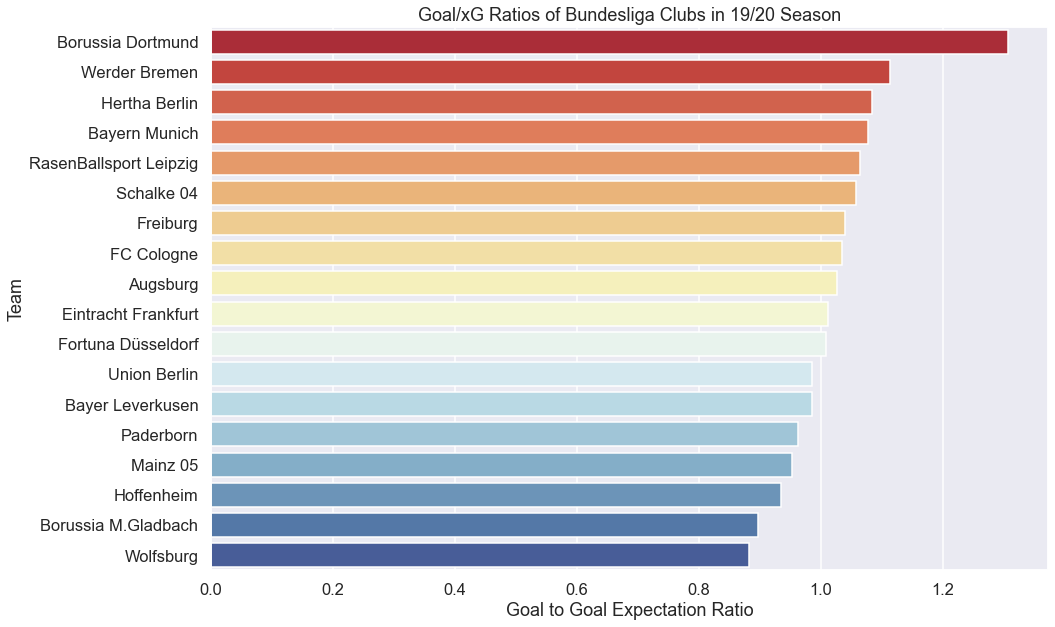

In [13]:
ax = plt.subplots(figsize=(15, 10))
sns.barplot("goal/xG", "team", data=bundesliga_expected_actual.sort_values(by="goal/xG", ascending=False), palette="RdYlBu")
plt.ylabel("Team")
plt.xlabel("Goal to Goal Expectation Ratio")
plt.title("Goal/xG Ratios of Bundesliga Clubs in 19/20 Season")

# Evaluation of whether if the teams could live up to expectations in terms of goals scored
This bar plot essentially gives us a visual represantation of the teams' "goal efficiency" rates, where 1.0 means similarly to the bar plot above that the team in question scored as many goals as they were expected to. 

Therefore the teams with a higher ratio, such as Borussia Dortmund or Werder Bremen, could be said to have overperformed in terms of converting chances to goals compared to those that are located at the lower sections of the graph, like Wolfsburg or Borussia Mönchengladbach.

Instead of the league in general, let's focus on a single team now. I chose RB Leipzig, since I've been enjoying their playing style and Julian Nagelsmann's display of his managerial skill set.

In [14]:
#Filter the Bundesliga dataset to get rows that only contain data for RB Leipzig
leipzig = bundesliga[bundesliga["team"] == "RasenBallsport Leipzig"]
leipzig.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
3536,Bundesliga,2019,a,3.93387,0.782907,3.933870,0.782907,12,2,4,0,2.8868,w,2019-08-18 17:00:00,1,0,0,3,3.150963,8.227273,181,22,15.769231,410,26,RasenBallsport Leipzig,-0.06613,0.782907,-0.1132
3537,Bundesliga,2019,h,1.77604,0.935237,1.776040,0.935237,2,4,2,1,2.0720,w,2019-08-25 14:30:00,1,0,0,3,0.840803,13.863636,305,22,9.296296,251,27,RasenBallsport Leipzig,-0.22396,-0.064763,-0.9280
3538,Bundesliga,2019,a,3.13131,1.458600,3.131310,1.458600,7,4,3,1,2.4716,w,2019-08-30 19:30:00,1,0,0,3,1.672710,8.166667,294,36,8.285714,290,35,RasenBallsport Leipzig,0.13131,0.458600,-0.5284
3539,Bundesliga,2019,h,1.65427,1.670400,0.896496,1.670400,7,10,1,1,1.3633,d,2019-09-14 16:30:00,0,1,0,1,-0.773904,17.178571,481,28,9.142857,192,21,RasenBallsport Leipzig,0.65427,0.670400,0.3633
3540,Bundesliga,2019,a,1.72557,0.583174,1.725570,0.583174,8,9,3,0,2.2829,w,2019-09-21 16:30:00,1,0,0,3,1.142396,9.785714,274,28,13.952381,293,21,RasenBallsport Leipzig,-1.27443,0.583174,-0.7171


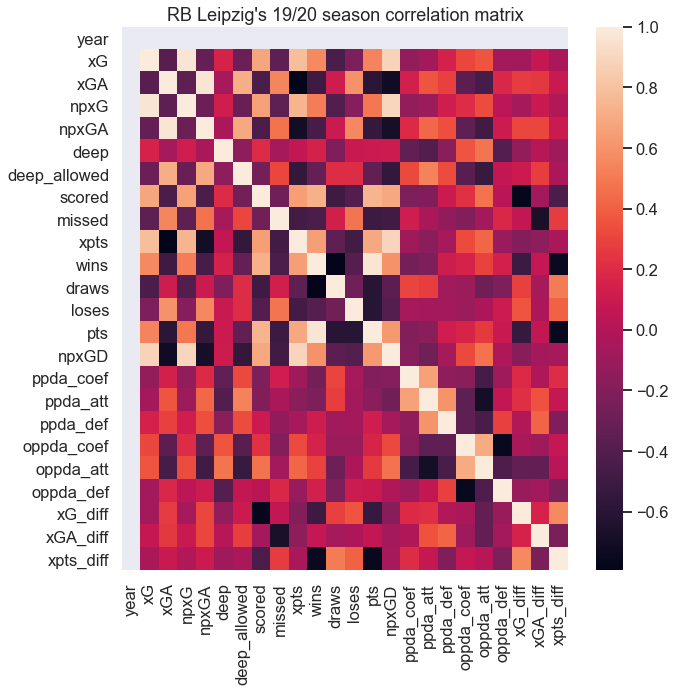

In [15]:
#Create a heatmap to visulize the Pearson correlation coefficient for RB Leipzig metrics
sns.set_context("talk")
ax=plt.subplots(figsize=(10,10))
sns.heatmap(leipzig.corr())
plt.title("RB Leipzig's 19/20 season correlation matrix")
plt.savefig("leipzig_matrix")

# Correlation between RB Leipzig data features 
The correlation matrix is a very intuitive visualization method to discover *linear* relationships between features. Although it must be noted that a low Pearson coefficient doesn't necessarily indicate that the features in question are not correlated at all, this value only informs us of whether if the selected features are *linearly* correlated. Therefore, a very strong polynomial correlation (such as a parabola) between two variables will still return a low Pearson coefficient.

In [16]:
#Create variables by filtering which venue the game was played at
leipzig_home = leipzig[leipzig["h_a"] == "h"]
leipzig_away = leipzig[leipzig["h_a"] == "a"]

In [17]:
#Calculate the average goal expectations by venue 
print(leipzig_home.xG.mean(), leipzig_away.xG.mean())

1.9151372352941172 2.5628958823529415


In [18]:
#See how many games RB Leipzig won, lost or drew
leipzig["result"].value_counts()

w    18
d    12
l     4
Name: result, dtype: int64

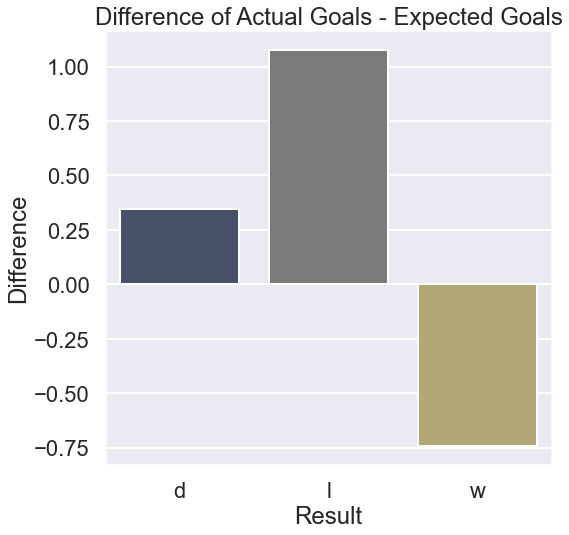

In [23]:
leipzig_r_xg = leipzig.groupby("result").xG_diff.mean().head()
leipzig_r_xg = leipzig_r_xg.reset_index()

sns.set_style("darkgrid")
sns.set_context("poster")
ax = plt.subplots(figsize=(8, 8))
sns.barplot("result", "xG_diff", data=leipzig_r_xg, palette="cividis")
plt.title("Difference of Actual Goals - Expected Goals")
plt.ylabel("Difference")
plt.xlabel("Result")
plt.show()

# Goals scored - goal expectation difference per result category
Here's another plot that I find enjoyable to look at. Each bar stands for a result (win/draw/lose) and the y-axis represents the mean difference between the actual count of goals scored and the goal expectation metric. Or to mathematically notate:

(The average of actual goal counts for each result category) - (The average of xG for each result category)

According to the above graph, Leipzig have exceeded expectations in terms of goal scoring for the games they won, which means that they scored fewer goals than they were supposed to. And interestingly enough, Leipzig apparently have overperformed in the games they couldn't win and scored more goals than they were expected to. This might indicate that Leipzig won the games they bagged 3 points by dominating their opponents, whereas for the ones they couldn't win the team were outperformed on the pitch and couldn't get many scoring opportunities, yet somehow managed to make the ball cross the goal line.

In [20]:
plt.clf()

<Figure size 432x288 with 0 Axes>

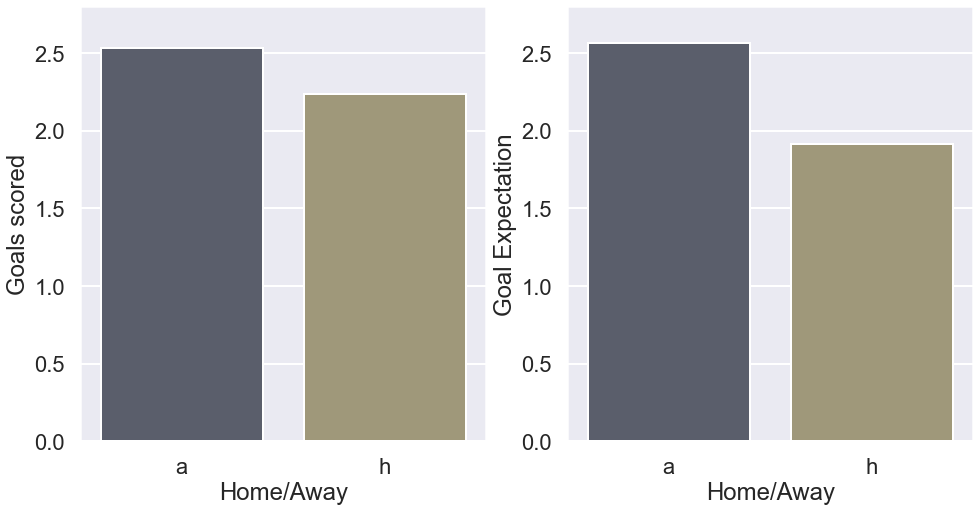

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

sns.set_context("poster")

sns.barplot("h_a", "scored", data=leipzig, ax=ax1, ci=False, palette = "cividis")
ax1.set(xlabel=("Home/Away"), ylabel=("Goals scored"), ylim=[0, 2.8])

sns.barplot("h_a", "xG", data=leipzig, ax=ax2 , ci=False, palette = "cividis")
plt.ylim([0, 2.8])
plt.xlabel("Home/Away")
plt.ylabel("Goal Expectation")
plt.show()

# Comparison of goals scored and xG by venue played (home/away)
The plots above allow us to compare the average counts of goals scored and expected per game by whether the game was played at Red Bull Arena or not. 

It appears that Leipzig have performed better at away games in terms of scoring goals and there's just a slight difference between the actual and expected amount of goals for away games. 

For home games however, the difference between actual goals and xG seem to differ roughly by 0.5 goals in average. Basically, Leipzig have (again, roughly) scored a goal more than they should have for each two game played at home. This might've been caused by a variety of factors, such as fan support or opponents shifting to a more reactive style of play since it's an away game. Therefore it could lead to incorrect assumptions if we were to draw conclusions from these graphs alone.

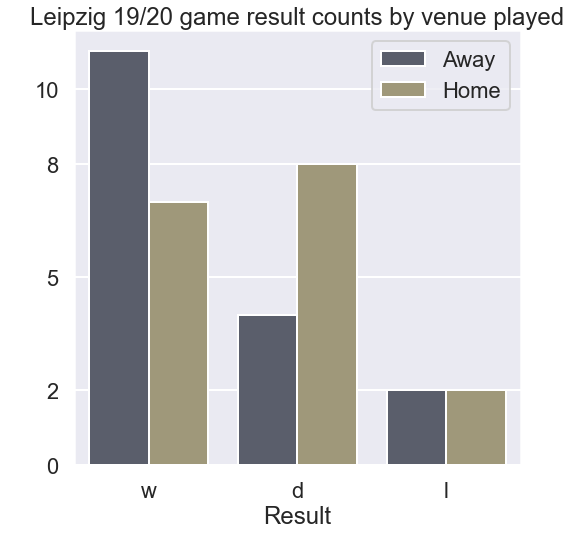

h_a  result
a    w         11
     d          4
     l          2
h    d          8
     w          7
     l          2
Name: result, dtype: int64


In [22]:
results_h_a = leipzig.groupby("h_a").result.value_counts()
ax = plt.subplots(figsize = (8, 8))

sns.countplot("result",data=leipzig,hue="h_a", palette = "cividis")
plt.yticks([0, 2, 5, 8, 10])
plt.title("Leipzig 19/20 game result counts by venue played")
plt.xlabel("Result")
plt.ylabel(" ")
plt.legend(["Away", "Home"])
plt.show()
print(leipzig.groupby("h_a").result.value_counts())

# Result counts by venue the game was played
Just like the bar plots under the above cells which depicted that Leipzig had scored more goals away, the team appears to have also won almost 50% more games away compared to home matches. The significance of their away performance manifests itself further considered that Leipzig has more draws at home than wins. 

It wouldn't be correct to draw any conclusions without further analysis although, on whether if they just overperformed at away games or their home record's an outcome of underperformance. These statements might sound like they are essentially addressing the same thing at first, however it could be seen that is not the case after going over them once more carefully.

# What does it take to win the title?

We looked into RB Leipzig's performance data, and we saw that RB Leipzig should've been second place if Borussia Dortmund didn't overperform in terms of point collected throughout the season, which'd put them right under the reigning champions, Bayern München.

So what else do Leipzig need to show in order to reach the finish line first? Let's compare them against Bayern and see what we can find!

In [35]:
#Select rows with only Bayern and Leipzig as teams
leipzig_bayern = bundesliga[(bundesliga["team"] == "Bayern Munich") | (bundesliga["team"] == "RasenBallsport Leipzig")]
leipzig_bayern.head()

,league,year,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,result,date,wins,draws,loses,pts,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff
3060,Bundesliga,2019,h,2.47707,1.18459,1.71929,1.184590,17,2,2,2,2.3576,d,2019-08-16 19:30:00,0,1,0,1,0.534700,10.500000,168,16,16.217391,373,23,Bayern Munich,0.47707,-0.81541,1.3576
3061,Bundesliga,2019,a,1.59729,1.08016,0.83951,1.080160,9,6,3,0,1.8269,w,2019-08-24 17:30:00,1,0,0,3,-0.240650,9.684211,184,19,18.280000,457,25,Bayern Munich,-1.40271,1.08016,-1.1731
3062,Bundesliga,2019,h,3.34597,0.72047,3.34597,0.720470,8,2,6,1,2.8148,w,2019-08-31 14:30:00,1,0,0,3,2.625500,5.354839,166,31,20.350000,407,20,Bayern Munich,-2.65403,-0.27953,-0.1852
3063,Bundesliga,2019,a,1.67040,1.65427,1.67040,0.896496,10,7,1,1,1.3717,d,2019-09-14 16:30:00,0,1,0,1,0.773904,9.142857,192,21,17.178571,481,28,Bayern Munich,0.67040,0.65427,0.3717
3064,Bundesliga,2019,h,2.92351,1.03267,2.16573,1.032670,12,7,4,0,2.5456,w,2019-09-21 13:30:00,1,0,0,3,1.133060,7.920000,198,25,14.500000,319,22,Bayern Munich,-1.07649,1.03267,-0.4544


Text(0, 0.5, ' ')

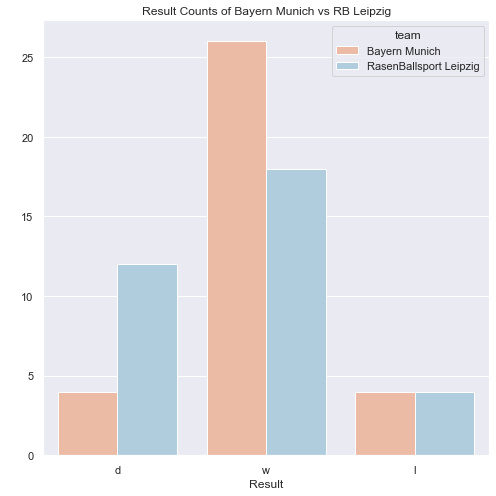

In [47]:
#Compare the results of Bayern and Leipzig
ax = plt.subplots(figsize = (8, 8))
sns.set_context("notebook")
sns.countplot("result", hue="team", data=leipzig_bayern, palette="RdBu")
plt.title("Result Counts of Bayern Munich vs RB Leipzig")
plt.xlabel("Result")
plt.ylabel(" ")

team
Bayern Munich             11.970588
RasenBallsport Leipzig     8.911765
Name: deep, dtype: float64
team
Bayern Munich             21.020124
RasenBallsport Leipzig    14.923454
Name: oppda_coef, dtype: float64


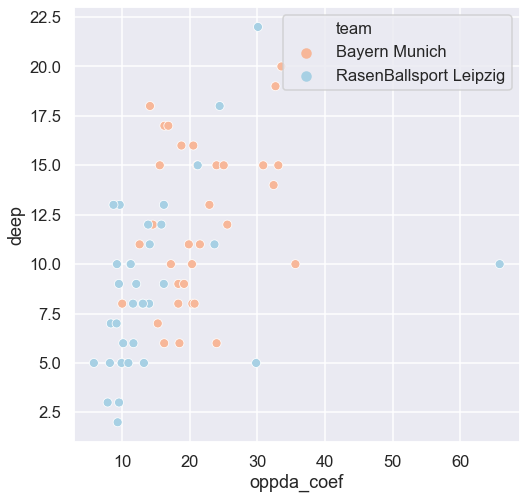

In [53]:
ax = plt.subplots(figsize = (8, 8))
sns.set_context("talk")
sns.scatterplot("oppda_coef", "deep", hue="team", data=leipzig_bayern, palette="RdBu")
print(leipzig_bayern.groupby("team").deep.mean())
print(leipzig_bayern.groupby("team").oppda_coef.mean())

What this graph and the mean values of oppda_coef and deep metrics tell us is that despite facing tougher average pressure (50% tougher!) from their opponents, Bayern managed to achieve a higher number of completed passes around and inside their opponents' penalty box.